In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
df.sum().isnull()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [7]:
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

In [8]:
# Separar 80% da amostra para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

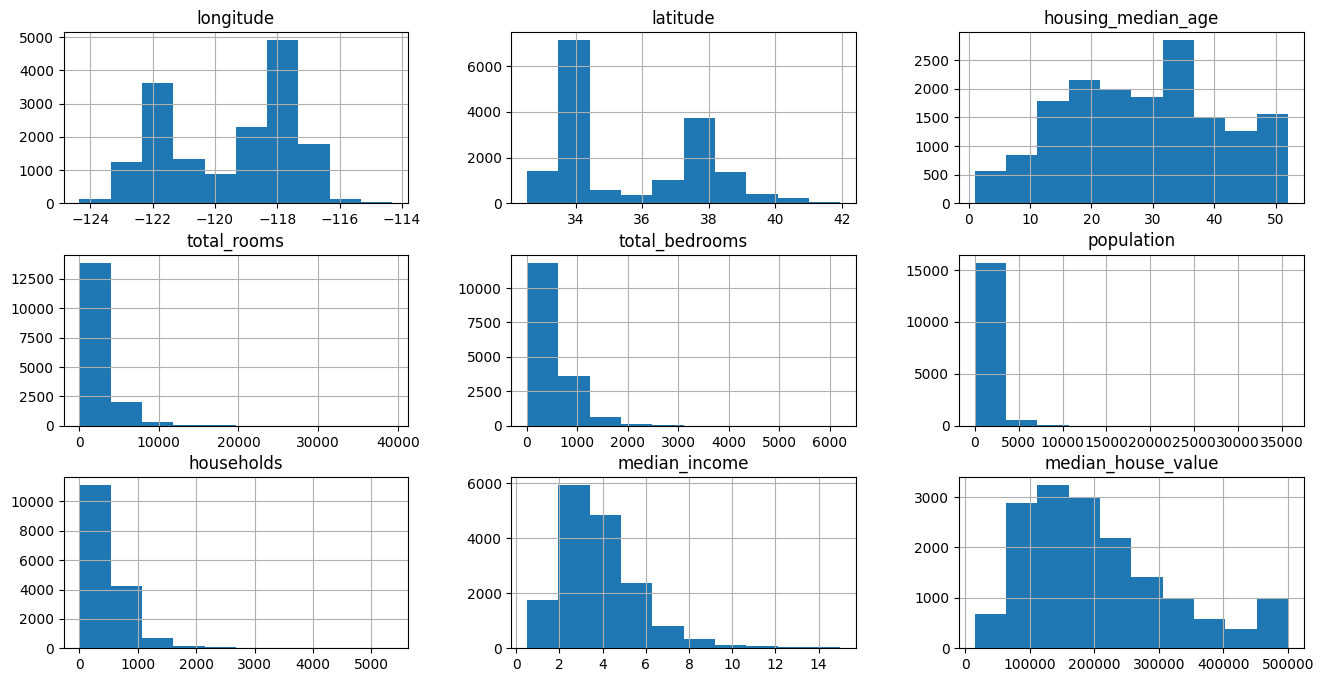

In [10]:
train_data.hist(figsize=(16,8))

<Axes: >

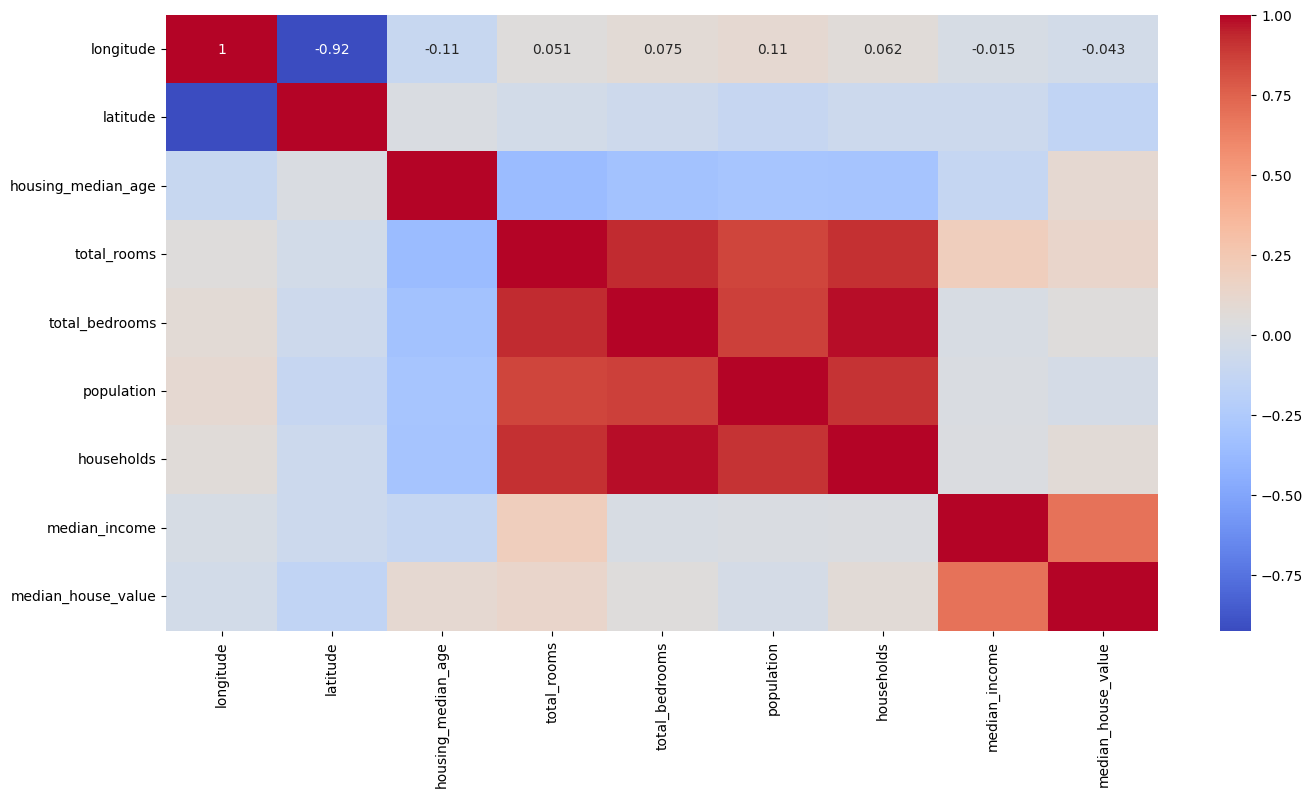

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [12]:
Normal = pd.DataFrame({'N': train_data[['total_rooms','total_bedrooms','population','households']].count(),
                     'Curtose': train_data[['total_rooms','total_bedrooms','population','households']].kurtosis(),
                     'Assimetria': train_data[['total_rooms','total_bedrooms','population','households']].skew()})

In [13]:
Normal.round(4)

,N,Curtose,Assimetria
total_rooms,16346,30.9913,4.0576
total_bedrooms,16346,20.2887,3.3706
population,16346,69.0977,4.6945
households,16346,19.9311,3.3048


In [14]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

In [15]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7198
INLAND        5210
NEAR OCEAN    2117
NEAR BAY      1817
ISLAND           4
Name: count, dtype: int64

In [16]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 4596 to 7641
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   median_house_value  16346 non-null  float64
 9   <1H OCEAN           16346 non-null  bool   
 10  INLAND              16346 non-null  bool   
 11  ISLAND              16346 non-null  bool   
 12  NEAR BAY            16346 non-null  bool   
 13  NEAR OCEAN          16346 non-null  bool   
dtypes: bool(5), float64(9)
memory usage: 1.8 MB


<Axes: >

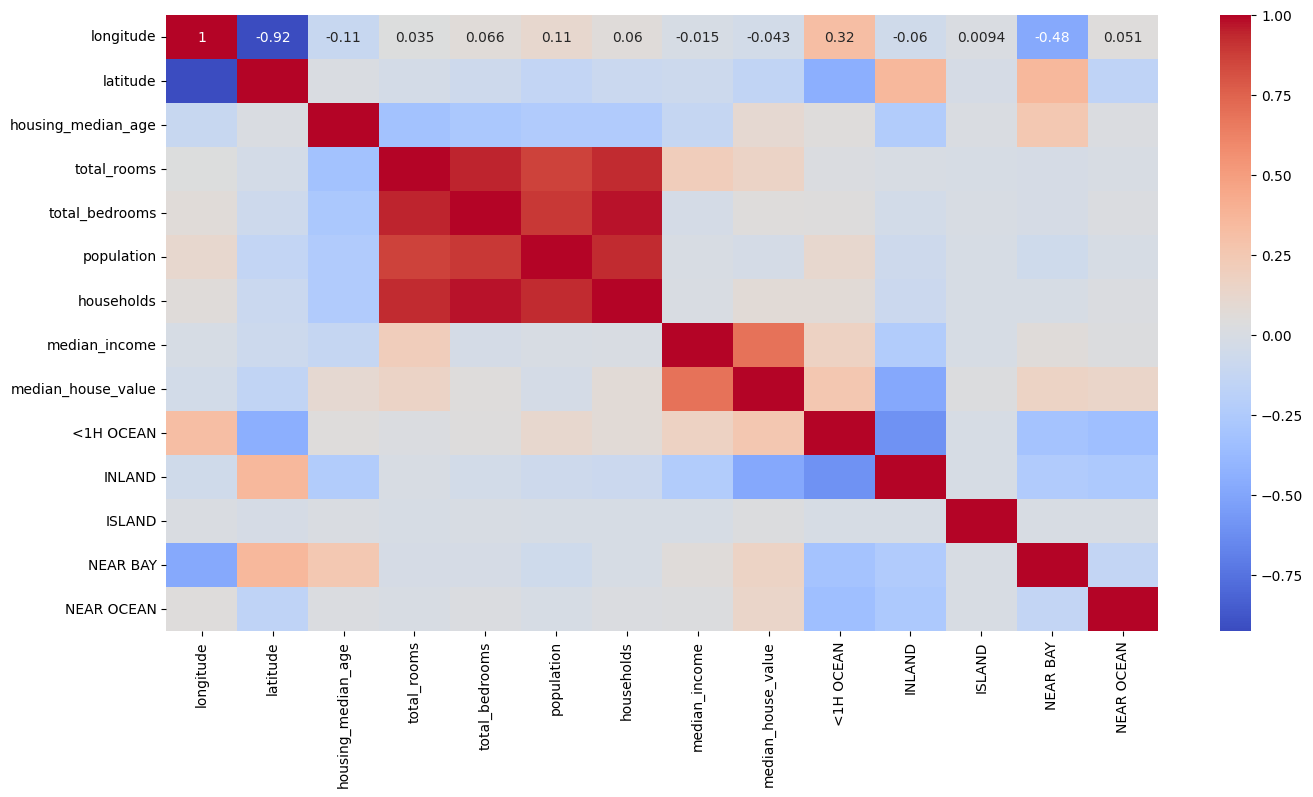

In [18]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

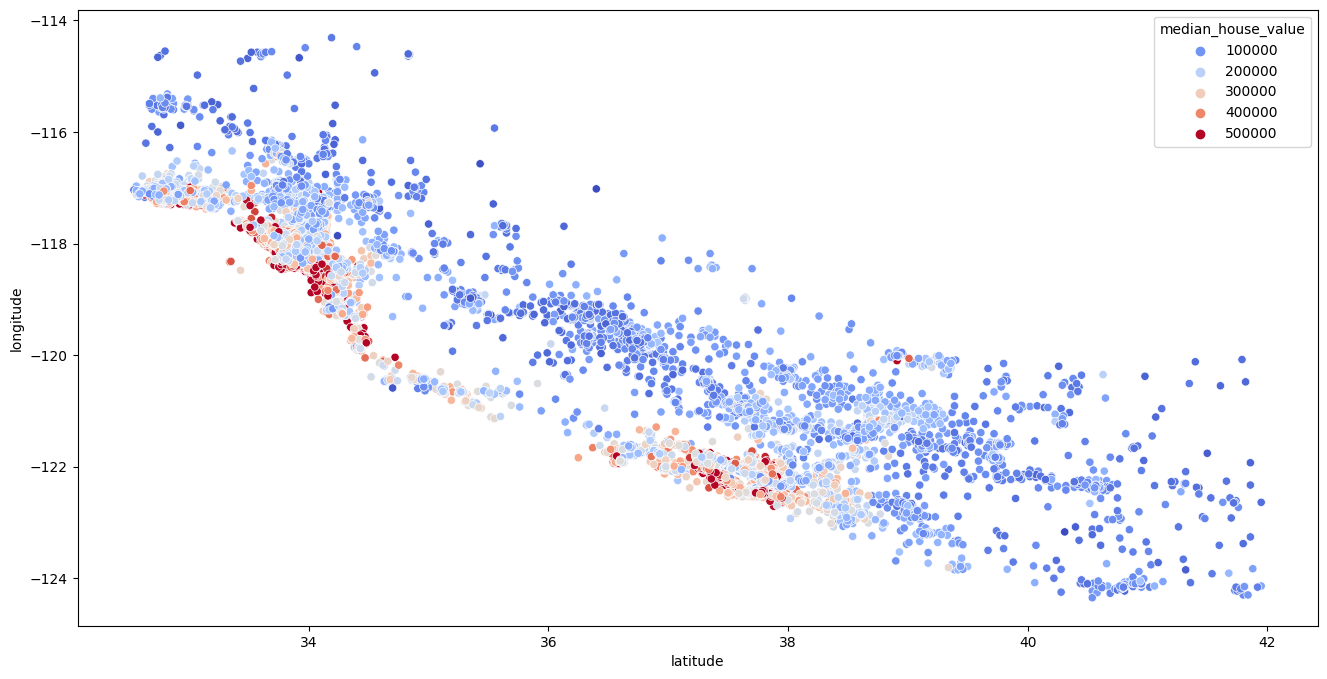

In [19]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [20]:
cols=['longitude','latitude','median_house_value']
df_heatmap=df[cols].copy()

In [21]:
hm = folium.Map(location=(38.5666, -121.469), tiles='OpenStreetMap')

# Convertendo os dados do DataFrame em uma lista de listas
heat_data = df_heatmap[['latitude', 'longitude', 'median_house_value']].values.tolist()

gradient = {0.0: 'blue', 0.4: 'lime', 0.7: 'yellow', 1.0: 'red'}
# Adicionando o mapa de calor
HeatMap(heat_data, min_opacity=0.4, blur=18,gradient=gradient).add_to(folium.FeatureGroup(name='Heat Map').add_to(hm))

# Adicionando o controle de camadas
folium.LayerControl().add_to(hm)

# Exibindo o mapa
hm

In [22]:
train_data['bedroom_ratio'] =  train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

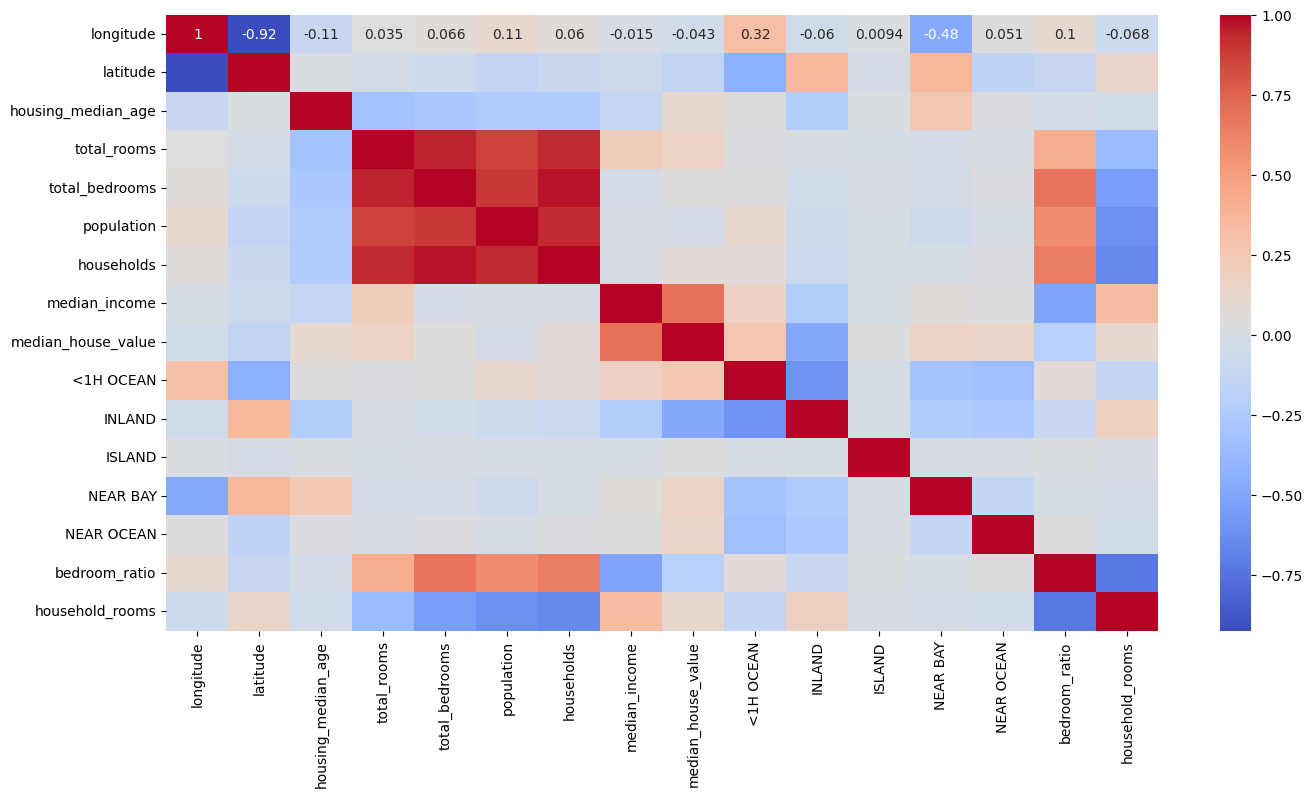

In [23]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

## Regressão Linear

In [24]:
scaler = StandardScaler()

X_train,y_train =  train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [25]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] =  test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']


In [26]:
X_test, y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [27]:
X_test_s=scaler.transform(X_test)

In [28]:
reg.score(X_test_s,y_test)

0.6655766135614443

## Random Forest

In [29]:
forest = RandomForestRegressor()

forest.fit(X_test_s,y_test)

RandomForestRegressor()

In [30]:
forest.score(X_test_s,y_test)

0.9645187816174392

In [31]:
forest = RandomForestRegressor()

param_grid = {
     'n_estimators': [100,200,300],
     'min_samples_split': [2,4,6,8],
     'max_depth': [None,4,8]
}

grid_search = GridSearchCV(forest, param_grid,cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
best_forest=grid_search.best_estimator_

In [33]:
best_forest.score(X_test_s,y_test)

0.806669526281286